In [1]:
import pandas as pd
import numpy as np
import pymorphy2
import string
import nltk
from nltk.corpus import stopwords
import re

In [304]:
# DATA EXPLORATION
import os
#set working directory
os.chdir("/Users/urijzuzaev/Desktop/Thesis/reviews_dataset")

In [305]:
# DATA EXPLORATION
data = pd.read_csv('combined_dataset.csv')

In [88]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [207]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82849 entries, 0 to 82848
Data columns (total 2 columns):
Review       82849 non-null object
Sentiment    82849 non-null object
dtypes: object(2)
memory usage: 1.3+ MB


In [206]:
dataset.sample(frac=1).head(10)

,Review,Sentiment
67436,Если вам нравятся книги Дж. Даррелла - вы не п...,positive
18058,Очень понравилась вторая часть. Первую половин...,negative
51845,Дочитала наконец-то этот цикл Буревого и нахож...,positive
70730,Книга прекрасно издана и оригинально оформлена...,positive
79729,Очень хорошее детское фэнтези! герои многих на...,positive
40139,"Легкий маленький подростковый романчик, где вс...",neutral
67921,"Честно говоря, ожидала большего. На мой взгляд...",positive
61214,"Самая прекрасная сказка Андерсена, великолепна...",positive
24528,"Роман, написан в ""вымирающем"" эпистолярном жан...",neutral
53942,Правдивая история о нелегкой судьбе африканско...,positive


In [23]:
data.describe()

,Review,Sentiment
count,82849,82849
unique,82385,3
top,"Отличная книга, стоит прочесть. Нашла тутhttp:...",positive
freq,11,61083


In [19]:
data.duplicated().sum()

297

In [39]:
data['Sentiment'].value_counts()

positive    61083
neutral     11610
negative    10156
Name: Sentiment, dtype: int64

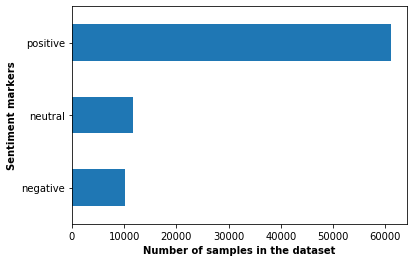

In [208]:
import matplotlib.pyplot as plt

ax = data["Sentiment"].value_counts(sort=False).plot(kind="barh")
ax.set_xlabel("Number of samples in the dataset", weight="bold")
ax.set_ylabel("Sentiment markers", weight="bold");

In [37]:
print(data['Review'].apply(len).min())
print(data['Review'].apply(len).mean())
print(data['Review'].apply(len).max())

5
491.4560827529602
21446


In [329]:
data['review_len'] = data['Review'].astype(str).apply(len)
data['Word count'] = data['Review'].apply(lambda x: len(str(x).split()))

In [330]:
data.head

<bound method NDFrame.head of                                                   Review Sentiment  review_len  Word count
0      Очень милая и трогательная вещица, читается ле...  positive         184          25
1      Прелесть, как и весь ОГенри. Редкое умение пис...  positive         196          27
2      Скучно... Типичное женское чтиво. Не знаю, что...  positive         102          15
3      Неплохо, хотя беда, что и с любыми сериями - к...  negative         115          20
4      Сюжет книги очень интересен, затягивает. Поэто...   neutral          94          12
...                                                  ...       ...         ...         ...
82844  Очень милая и добрая книжка. Однозначно, не ше...  positive         279          41
82845  Очень душевная книга, и очень грузинская! Заба...  positive          84          12
82846  Все равно Чака любить не перестану, но книга а...  positive         240          35
82847  В книге присутствует богатое описание истории ...  po

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a9c747ad0>,
      dtype=object)

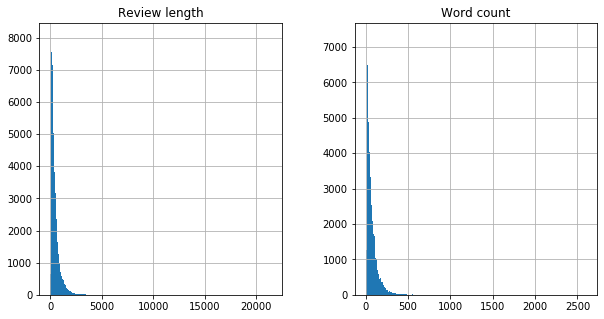

In [211]:
data[['Review length', 'Word count']].hist(bins=500, figsize=(10, 5))

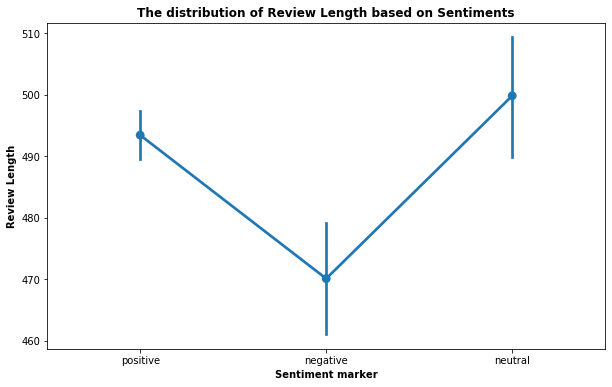

In [331]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.pointplot(x = "Sentiment", y = "review_len", data = data)
plt.xlabel("Sentiment marker", weight='bold')
plt.ylabel("Review Length", weight='bold')
plt.title("The distribution of Review Length based on Sentiments", weight='bold')
plt.show()

In [403]:
data_short = pd.read_csv('short_dataset.csv')
data_neg = data_short[data_short['Sentiment'] == 'negative'][['Review', 'Sentiment']]
data_pos = data_short[data_short['Sentiment'] == 'positive'][['Review', 'Sentiment']]
len(data_short)

20312

In [319]:
dmin = data_short['Review'].apply(len).min()
dmean = data_short['Review'].apply(len).mean()
dmax = data_short['Review'].apply(len).max()

print(f"The minimum review length = {dmin}")
print("The minimum review length = {:.0f}".format(dmean))
print(f"The minimum review length = {dmax}")

The minimum review length = 5
The minimum review length = 460
The minimum review length = 17385


In [184]:
def get_clean_tokens(sentence):
    tokens = re.findall("\w+", sentence.lower())
    tokens_no_stops = [word for word in tokens if (word not in punctuation_symbols) and (word not in stop_words)]
    tokens_no_singles = [token for token in tokens_no_stops if len(token) > 4]
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens_no_singles]
    return lemmatized_tokens
pos_tok = [get_clean_tokens(sentence) for sentence in data_pos['Review']]
pos_tok_join = [' '.join(sent) for sent in pos_tok]

In [183]:
morph = pymorphy2.MorphAnalyzer()
def get_clean_tokens(sentence):
    tokens = re.findall("\w+", sentence.lower())
    tokens_no_stops = [word for word in tokens if (word not in punctuation_symbols) and (word not in stop_words)]
    tokens_no_singles = [token for token in tokens_no_stops if len(token) > 4]
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens_no_singles]
    return lemmatized_tokens
neg_tok = [get_clean_tokens(sentence) for sentence in data_neg['Review']]
neg_tok_join = [' '.join(sent) for sent in neg_tok]

In [129]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
punctuation_symbols = set(string.punctuation)

def get_clean_tokens(sentence):
    tokens = re.findall("\w+", sentence.lower())
    tokens_no_stops = [word for word in tokens if (word not in punctuation_symbols) and (word not in stop_words)]
    tokens_no_singles = [token for token in tokens_no_stops if len(token) > 3]
    morph = pymorphy2.MorphAnalyzer()
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens_no_singles]
    return lemmatized_tokens

neg_sents_as_tokens = [get_clean_tokens(sentence) for sentence in data_neg['Review']]
neg_sents_as_strings = [' '.join(sent) for sent in neg_sents_as_tokens]

In [130]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
punctuation_symbols = set(string.punctuation)

def get_clean_tokens(sentence):
    tokens = re.findall("\w+", sentence.lower())
    tokens_no_stops = [word for word in tokens if (word not in punctuation_symbols) and (word not in stop_words)]
    tokens_no_singles = [token for token in tokens_no_stops if len(token) > 3]
    morph = pymorphy2.MorphAnalyzer()
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens_no_singles]
    return lemmatized_tokens

pos_sents_as_tokens = [get_clean_tokens(sentence) for sentence in data_pos['Review']]
pos_sents_as_strings = [' '.join(sent) for sent in pos_sents_as_tokens]

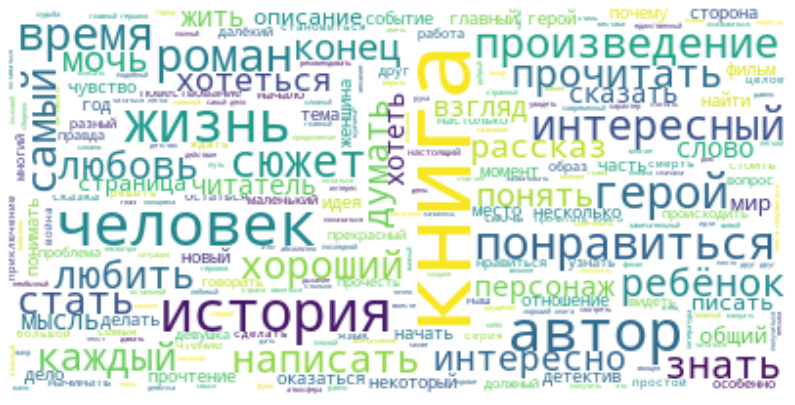

In [217]:
long_string2 = ' '.join(review for review in pos_sents_as_strings)
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
stopwords = set(stopwords.words('russian'))
stopwords = stopwords.union(["этот", "свой", "весь", "читать", "книгу", "книги", "слишком", "жизни", "книге", "людей", "автора", "просто", "героев", "которых", "которой", "прочитала", "прочтения", "наверное", "довольно", "конце", "которая", "которого", "пока", "целом", "хотя", "очень", "конечно", "кажется", "самом деле", "лишь", "однако", "поэтому", "нужно", "таки", "вообще", "которые", "читала", "именно", "такое", "достаточно", "возможно", "действительно", "хотя", "сразу", "немного", "общем", "вроде", "который", "читала", "думаю", "которым", "совершенно"])
os.chdir("/Users/urijzuzaev/Desktop/")
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(long_string2)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.savefig("WordCloud1.png");

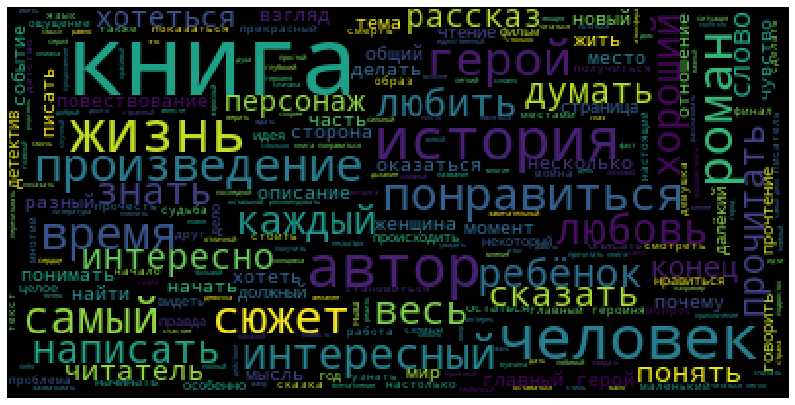

In [220]:
long_string3 = ' '.join(review for review in neg_sents_as_strings)
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
stopwords = set(stopwords.words('russian'))
stopwords = stopwords.union(["этот", "читать", "стать", "мочь", "свой", "книгу", "книги", "слишком", "жизни", "книге", "людей", "автора", "просто", "героев", "которых", "которой", "прочитала", "прочтения", "наверное", "довольно", "конце", "которая", "которого", "пока", "целом", "хотя", "очень", "конечно", "кажется", "самом деле", "лишь", "однако", "поэтому", "нужно", "таки", "вообще", "которые", "читала", "именно", "такое", "достаточно", "возможно", "действительно", "хотя", "сразу", "немного", "общем", "вроде", "который", "читала", "думаю", "которым", "совершенно"])

wordcl2 = WordCloud(stopwords = stopwords, background_color='black', max_font_size = 50, max_words = 5000).generate(long_string3)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl2)
plt.axis('off')
plt.savefig("WordCloud4.png");

In [300]:
#negative
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(neg_tok_join, 20)
datax2 = pd.DataFrame(common_words2, columns=['Trigrams', "Count"])
datax2.head(20)

,Trigrams,Count
0,читаться один дыхание,82
1,книга очень понравиться,76
2,очень понравиться книга,58
3,читаться легко быстро,54
4,книга читаться легко,50
5,прочитать один дыхание,42
6,очень интересный книга,38
7,читаться очень легко,37
8,очень хороший книга,30
9,книга очень интересный,29


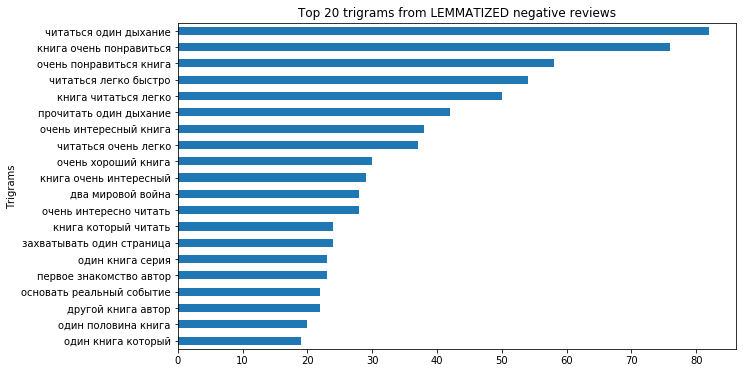

In [301]:
datax2.groupby('Trigrams').sum()['Count'].sort_values(ascending=True).plot(
    kind='barh',
    figsize=(10, 6),
    title = "Top 20 trigrams from LEMMATIZED negative reviews"
)

In [310]:
#negative
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(data_neg['Review'], 20)
datax2 = pd.DataFrame(common_words2, columns=['Trigrams', "Count"])
datax2.head(20)

,Trigrams,Count
0,на мой взгляд,300
1,на одном дыхании,237
2,на самом деле,222
3,на то что,173
4,тем не менее,142
5,могу сказать что,113
6,не смотря на,107
7,до сих пор,105
8,то же время,105
9,несмотря на то,93


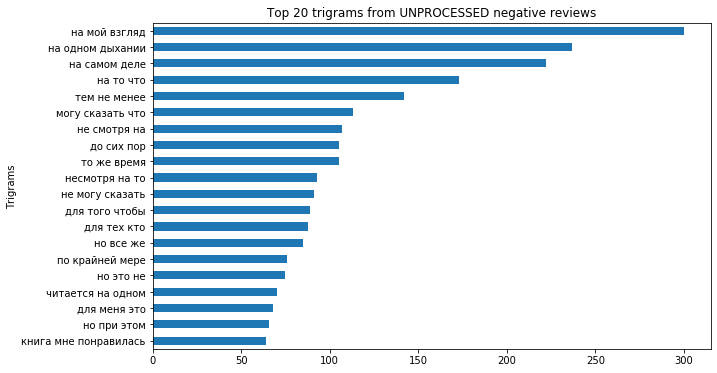

In [311]:
datax2.groupby('Trigrams').sum()['Count'].sort_values(ascending=True).plot(
    kind='barh',
    figsize=(10, 6),
    title = "Top 20 trigrams from UNPROCESSED negative reviews"
)